# **💳 Credit Card Fraud Detection using Machine Learning**

### 📌 **Project Overview**
#### **Objective**
The goal of this project is to build an end-to-end machine learning system that detects fraudulent credit card transactions.

**Domain:** Finance / Risk Analytics

**Target Variable:** Class

- 0 → Legitimate transaction
- 1 → Fraudulent transaction

#### **Key Challenges:**
- Highly imbalanced dataset (0.02% fraud cases)
- Minimize false negatives (missed fraud)
- Minimize false positives (customer inconvenience)

### **1️⃣ Define the Problem Clearly**

#### **🔹 Problem Statement:**

Credit card fraud leads to significant financial losses and customer distrust.
The objective is to detect fraudulent transactions accurately and early, minimizing false negatives.

#### **🔹 ML Task:**

- **Problem Type:** Binary Classification

- **Classes:** Fraud (1) vs Non-Fraud (0)

- **Challenge:** Extreme class imbalance

#### **🎯 Business Objective:**

Build a machine learning model to classify fraudulent vs non-fraudulent transactions, prioritizing high recall and ROC-AUC due to extreme class imbalance.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, matthews_corrcoef,
    roc_auc_score, roc_curve, precision_recall_curve
)

import pickle

### **2️⃣ Collect Data:**
**📂 Dataset Source**

- Public Kaggle Credit Card Fraud Dataset

- European cardholders transactions

**📊 Dataset Features:**

- 284,807 transactions

- 30 numerical features

- PCA-transformed features (V1–V28)

- Time, Amount

- Target: Class

### Load Dataset

In [2]:
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### 3️⃣ Data Cleaning & Preprocessing

#### *Analyzing the Data*

In [3]:
print("Dataset Shape:", data.shape)
print(data.info())
print(data.describe().T)

Dataset Shape: (284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-n

#### *Check Missing Values*

In [4]:
print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


#### *Check Duplicates*

In [5]:
print("Duplicates:" ,data.duplicated().sum())
data = data.drop_duplicates()
print("Duplicates after removing:" ,data.duplicated().sum())

Duplicates: 1081
Duplicates after removing: 0


#### *Target Distribution (Class Imbalance)*

In [6]:
print(data['Class'].value_counts())

Class
0    283253
1       473
Name: count, dtype: int64


#### *Fraud Percentage Calculation*

In [7]:
fraud_percentage = (data['Class'].sum() / len(data)) * 100
print(f"Fraud Percentage: {fraud_percentage:.4f}%")

Fraud Percentage: 0.1667%


⚠️ Fraud cases ≈ 0.17% → Highly imbalanced dataset

### 4️⃣ Exploratory Data Analysis

#### *📊 Class Distribution*

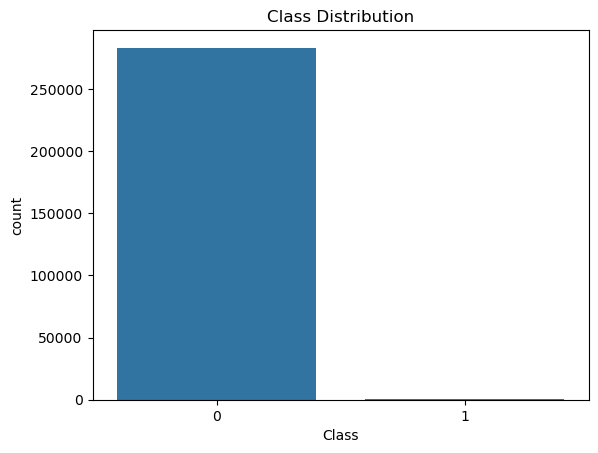

In [8]:
sns.countplot(x='Class', data=data)
plt.title("Class Distribution")
plt.show()

#### *📊 Transaction Amount Distribution*

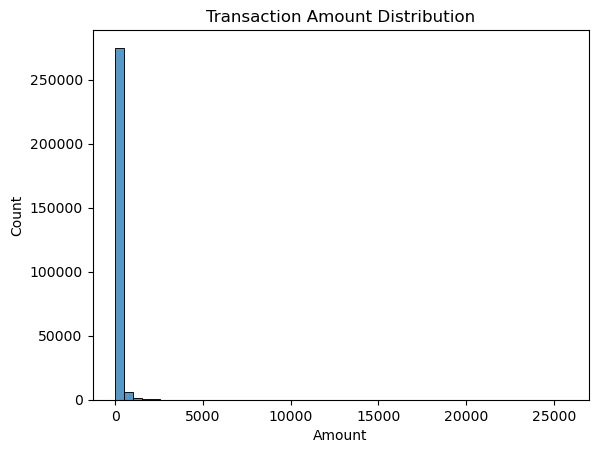

In [9]:
sns.histplot(data['Amount'], bins=50)
plt.title("Transaction Amount Distribution")
plt.show()

#### *📈 Correlation Heatmap*

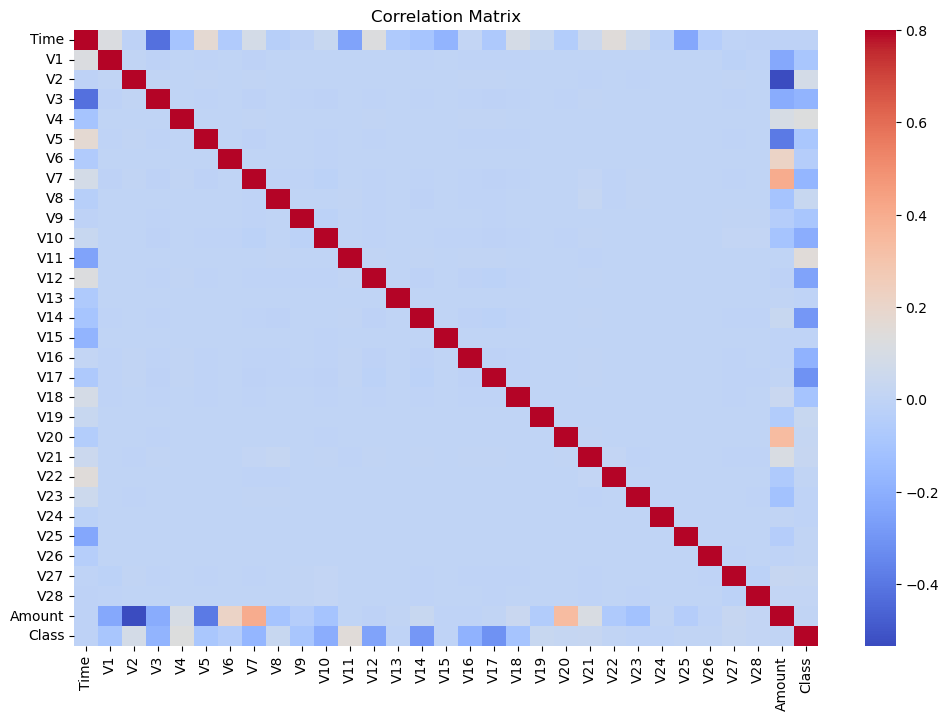

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), cmap='coolwarm', vmax=0.8)
plt.title("Correlation Matrix")
plt.show()

#### *📊 Fraud vs Normal Transaction Amount Distribution*

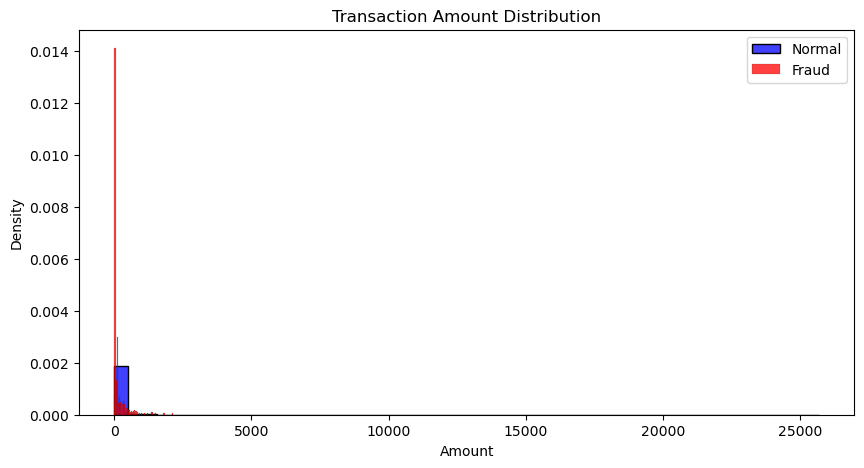

In [11]:
plt.figure(figsize=(10,5))
sns.histplot(data[data['Class']==0]['Amount'], bins=50, color='blue', label='Normal', stat='density')
sns.histplot(data[data['Class']==1]['Amount'], bins=50, color='red', label='Fraud', stat='density')
plt.legend()
plt.title("Transaction Amount Distribution")
plt.show()

#### *📊 Time-Based Fraud Analysis*

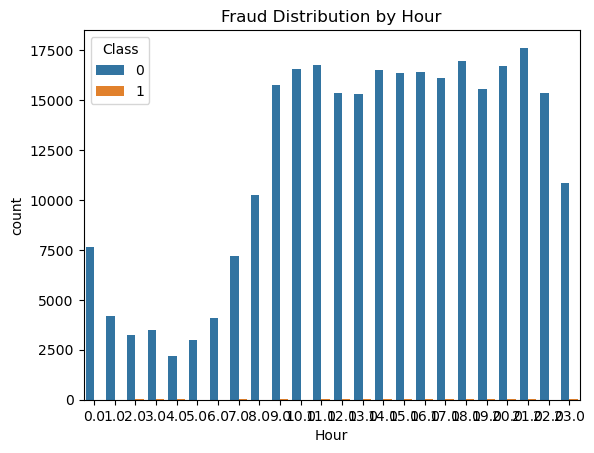

In [12]:
data['Hour'] = (data['Time'] // 3600) % 24

sns.countplot(x='Hour', hue='Class', data=data)
plt.title("Fraud Distribution by Hour")
plt.show()

#### *📊 Boxplots for Outlier Detection*

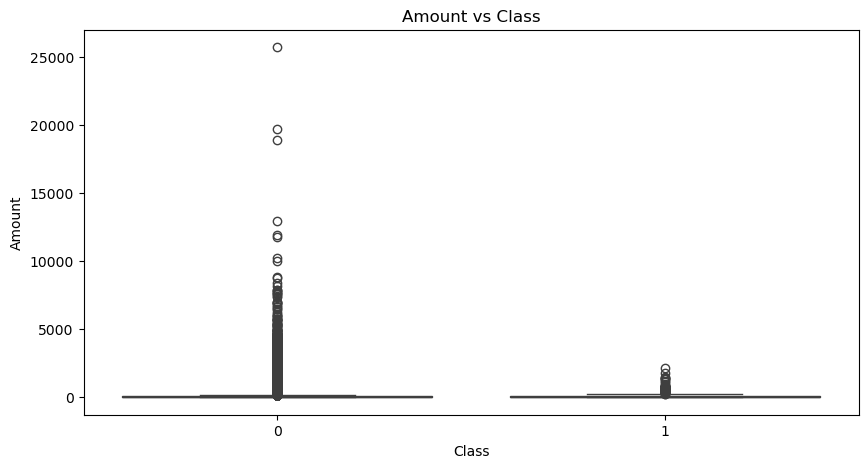

In [13]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Class', y='Amount', data=data)
plt.title("Amount vs Class")
plt.show()

#### *Feature Distribution Comparison*

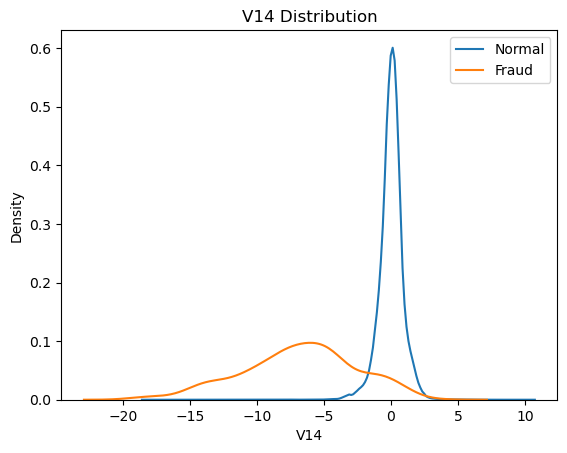

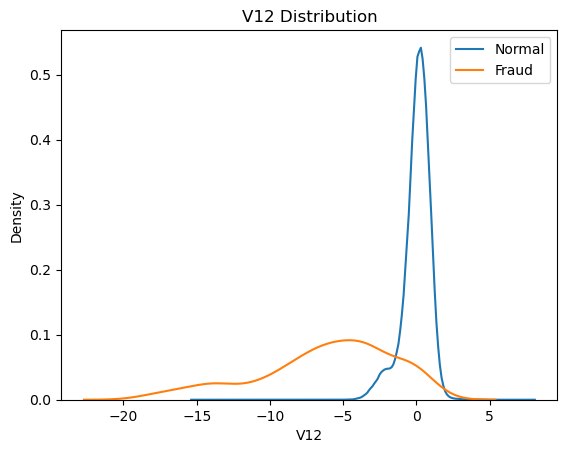

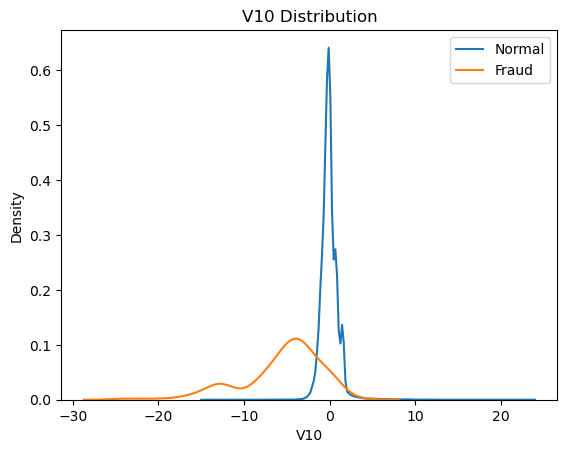

In [15]:
important_features = ['V14', 'V12', 'V10']

for feature in important_features:
    plt.figure()
    sns.kdeplot(data[data['Class']==0][feature], label='Normal')
    sns.kdeplot(data[data['Class']==1][feature], label='Fraud')
    plt.title(f"{feature} Distribution")
    plt.legend()
    plt.show()

#### **🔍 Key EDA Insights**

- Dataset is highly imbalanced

- Fraud amounts differ from normal transactions

- Accuracy is misleading → **ROC-AUC & Recall** are critical

### 5️⃣ Feature Engineering

#### *Scale Amount and Time*

In [16]:
scaler = StandardScaler()
data[['Time','Amount']] = scaler.fit_transform(data[['Time','Amount']])

### 6️⃣ Train & Test split

#### *Split Features & Target*

In [17]:
X = data.drop('Class', axis=1)
y = data['Class']

#### *Split Dataset*

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

✔ Stratified split preserves class ratio

### 7️⃣ Choose & Train Model

#### *Model Choice*
We use Logistic Regression with:

- Class weights

- Probability output

- Interpretable coefficients

### *Logistic Regression*

Accuracy : 0.9747294963521658
Precision: 0.05514950166112957
Recall   : 0.8736842105263158
F1 Score : 0.10375
MCC      : 0.21590414617279705
ROC-AUC  : 0.9683766440690879


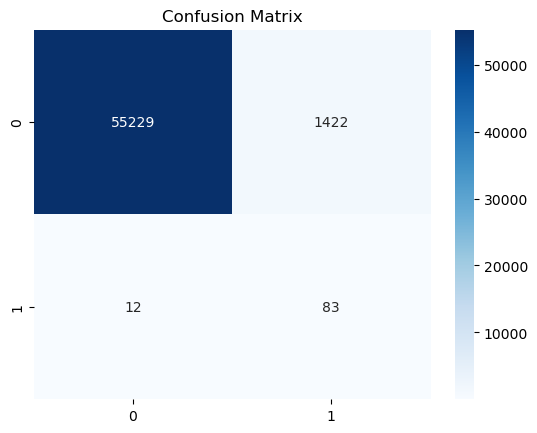

In [18]:
lr = LogisticRegression(class_weight='balanced', max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:,1]

def evaluate_model(y_test, y_pred, y_prob):
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1 Score :", f1_score(y_test, y_pred))
    print("MCC      :", matthews_corrcoef(y_test, y_pred))
    print("ROC-AUC  :", roc_auc_score(y_test, y_prob))
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.show()

evaluate_model(y_test, y_pred_lr, y_prob_lr)

### *Random Forest Model*

Accuracy : 0.9994537059880872
Precision: 0.9705882352941176
Recall   : 0.6947368421052632
F1 Score : 0.8098159509202454
MCC      : 0.8209224612630123
ROC-AUC  : 0.9299073087389177


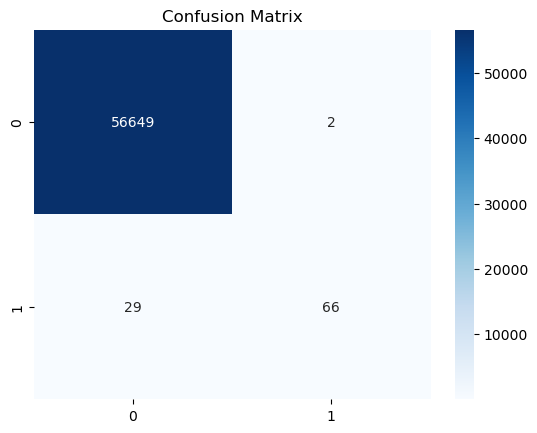

In [19]:
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

evaluate_model(y_test, y_pred_rf, y_prob_rf)

### *XGBoost Model*

Accuracy : 0.9995241955380115
Precision: 0.9358974358974359
Recall   : 0.7684210526315789
F1 Score : 0.8439306358381503
MCC      : 0.847810358473888
ROC-AUC  : 0.9714755813294511


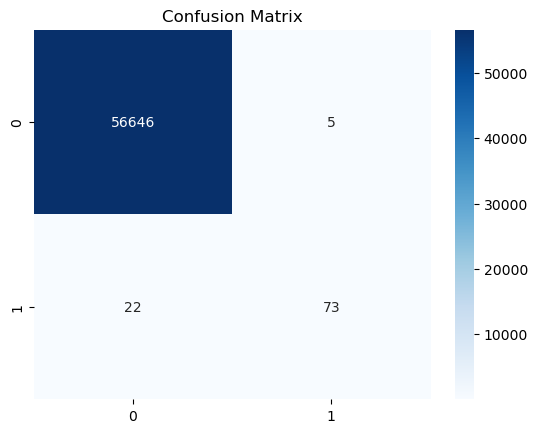

In [20]:
xgb = XGBClassifier(
    scale_pos_weight = len(y_train[y_train==0]) / len(y_train[y_train==1]),
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1
)

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:,1]

evaluate_model(y_test, y_pred_xgb, y_prob_xgb)

### 8️⃣ Evaluate Model

### *Cross Validation Scores*

In [21]:
cv_scores_lr = cross_val_score(lr, X, y, cv=5, scoring='f1', n_jobs=-1)
print("Logistic Regression CV F1:", cv_scores_lr.mean())

cv_scores_rf = cross_val_score(rf, X, y, cv=5, scoring='f1', n_jobs=-1)
print("Random Forest CV F1:", cv_scores_rf.mean())

cv_scores_xgb = cross_val_score(xgb, X, y, cv=5, scoring='f1', n_jobs=-1)
print("XGBoost CV F1:", cv_scores_xgb.mean())

Logistic Regression CV F1: 0.09494050987109011
Random Forest CV F1: 0.7567249133912105
XGBoost CV F1: 0.7016235059143465


### *ROC Curve Comparison*

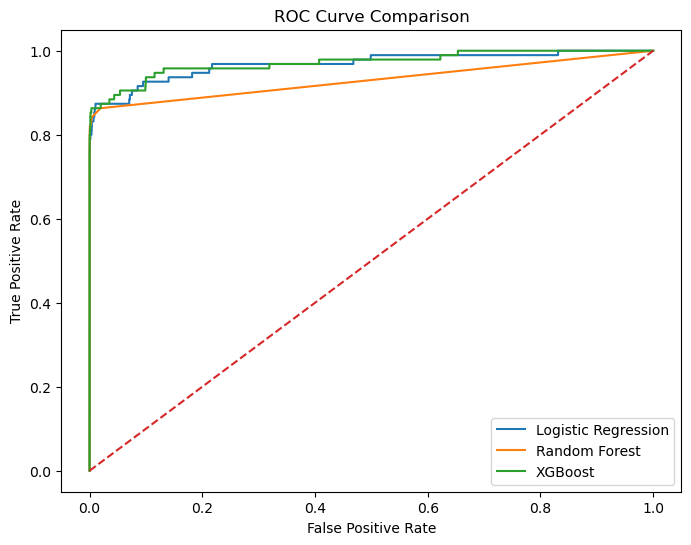

In [22]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)

plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, label="Logistic Regression")
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.plot(fpr_xgb, tpr_xgb, label="XGBoost")
plt.plot([0,1],[0,1],"--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

### *9️⃣ Handling Class Imbalance using SMOTE*

In [19]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

pd.Series(y_train_resampled).value_counts()

Class
0    226602
1    226602
Name: count, dtype: int64

### *Logistic Regression*

In [20]:
lr = LogisticRegression(
    class_weight='balanced',
    max_iter=1000
)
lr.fit(X_train_resampled, y_train_resampled)

LogisticRegression(class_weight='balanced', max_iter=1000)

### *Random Forest*

In [21]:
rf = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

### *XGBoost*

In [22]:
xgb = XGBClassifier(
    scale_pos_weight = y_train_resampled.value_counts()[0] / y_train_resampled.value_counts()[1],
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1,
    eval_metric='logloss'
)
xgb.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=-1,
              num_parallel_tree=None, ...)

### Model Evaluation after SMOTE

In [23]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("MCC:", matthews_corrcoef(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_prob))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.show()

Accuracy: 0.9737250202657456
Precision: 0.05313700384122919
Recall: 0.8736842105263158
F1 Score: 0.10018105009052504
MCC: 0.21178619554434439
ROC-AUC: 0.9618504434817429


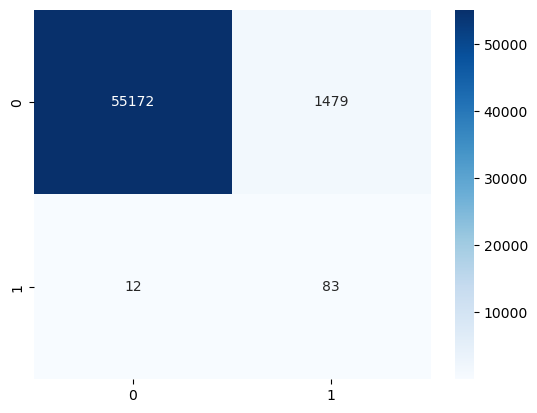

In [24]:
evaluate_model(lr, X_test, y_test)

Accuracy: 0.9994713283755683
Precision: 0.9113924050632911
Recall: 0.7578947368421053
F1 Score: 0.8275862068965517
MCC: 0.830854576899801
ROC-AUC: 0.9493554719617529


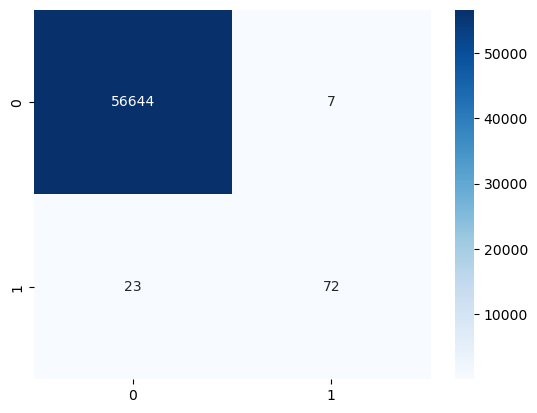

In [25]:
evaluate_model(rf, X_test, y_test)

Accuracy: 0.9989779015260988
Precision: 0.6637168141592921
Recall: 0.7894736842105263
F1 Score: 0.7211538461538461
MCC: 0.7233693304567061
ROC-AUC: 0.9704307723466581


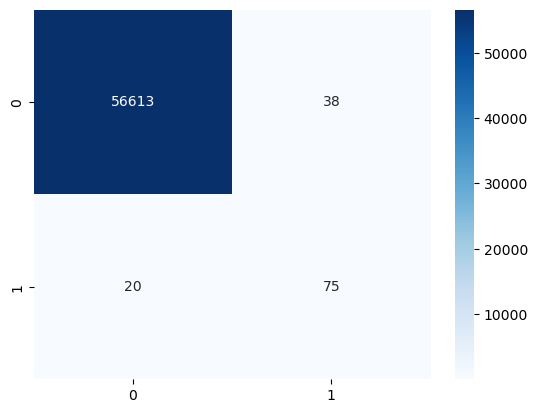

In [26]:
evaluate_model(xgb, X_test, y_test)

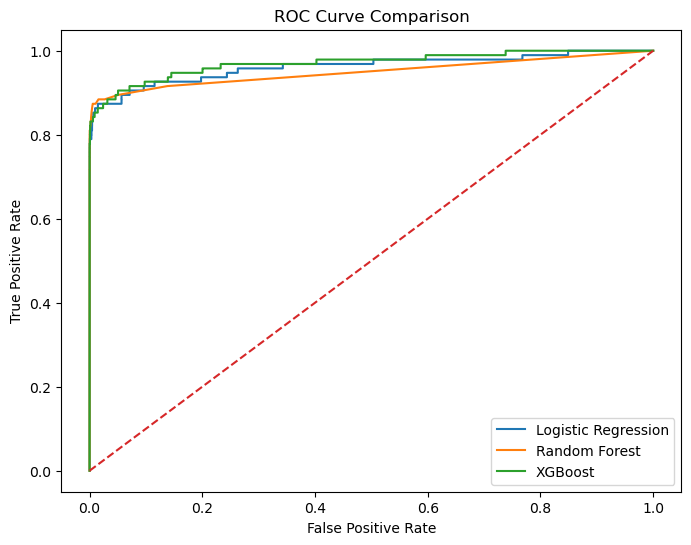

In [28]:
models = {
    "Logistic Regression": lr,
    "Random Forest": rf,
    "XGBoost": xgb
}

plt.figure(figsize=(8,6))

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=name)

plt.plot([0,1], [0,1], '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

### Threshold Optimization

In [29]:
custom_threshold = 0.3
y_prob_rf = rf.predict_proba(X_test)[:,1]
y_pred_custom = (y_prob_rf > custom_threshold).astype(int)

print("Recall:", recall_score(y_test, y_pred_custom))
print("Precision:", precision_score(y_test, y_pred_custom))

Recall: 0.8105263157894737
Precision: 0.7938144329896907


### Feature Importance

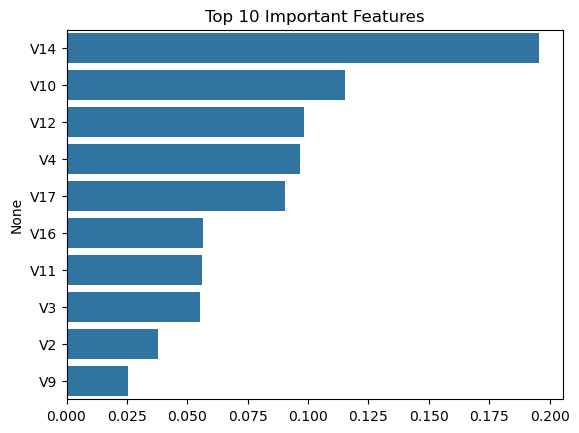

In [30]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(10)

sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 10 Important Features")
plt.show()

### Deployment – Streamlit

In [32]:
import joblib

joblib.dump(rf, "fraud_model.pkl")
joblib.dump(scaler, "scaler.pkl")
print("✅ All pickle files saved")

✅ All pickle files saved
